# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#Import Dataset as Pandas dataframe
data = pd.read_csv("data/smoking_driking_dataset.csv")
data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [3]:
data.shape

(991346, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

# Data Cleaning & Preprocessing

In [5]:
# Check for Null values
data.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [6]:
# Check for duplicate rows
data.duplicated().sum()

26

In [7]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)
data.shape

(991320, 24)

In [8]:
# Modify SMK_stat_type_cd for Binary Classification
# Remove rows with SMK_stat_type_cd == 2
df = data[data['SMK_stat_type_cd'] != 2]

# Convert SMK_stat_type_cd == 3 to 0 (smoking == 1, non-smoking == 0)
df['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].map({1: 0, 3: 1})
df.head(10)

C:\Users\lekhs\AppData\Local\Temp/ipykernel_5788/3210144032.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].map({1: 0, 3: 1})


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,1,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,0,N
5,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,1,Y
6,Female,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,115.0,75.0,12.3,1.0,0.8,19.0,12.0,12.0,0,N
7,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,1,Y
8,Male,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,141.0,100.0,15.1,1.0,0.8,32.0,23.0,26.0,0,Y
10,Male,45,155,55,79.2,1.0,1.0,1.0,1.0,118.0,...,130.0,55.0,12.9,1.0,0.8,19.0,14.0,19.0,0,N


In [9]:
print(df['DRK_YN'].unique())

['Y' 'N']


In [10]:
df['DRK_YN'] = df['DRK_YN'].str.strip()

C:\Users\lekhs\AppData\Local\Temp/ipykernel_5788/1264496912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRK_YN'] = df['DRK_YN'].str.strip()


In [11]:
valid_values = ['Y', 'N']
df = df[df['DRK_YN'].isin(valid_values)]
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,1,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,0,N


In [12]:
# Encode Target Variables
# DRK_YN (Drinker or Not): Y=1, N=0
df['DRK_YN'] = df['DRK_YN'].map({'Y': 1, 'N': 0})
df.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,0,1
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,1,0
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,0,0
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,0,0
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,0,0
5,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,1,1
6,Female,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,115.0,75.0,12.3,1.0,0.8,19.0,12.0,12.0,0,0
7,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,1,1
8,Male,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,141.0,100.0,15.1,1.0,0.8,32.0,23.0,26.0,0,1
10,Male,45,155,55,79.2,1.0,1.0,1.0,1.0,118.0,...,130.0,55.0,12.9,1.0,0.8,19.0,14.0,19.0,0,0


# Exploratory Data Analysis

In [13]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
count,816376.000000,816376.000000,816376.000000,816376.000000,816376.000000,816376.000000,816376.000000,816376.000000,816376.000000,816376.000000,...,816376.000000,816376.000000,816376.000000,816376.000000,816376.000000,816376.000000,816376.000000,816376.000000,816376.000000,816376.000000
mean,47.079134,161.138722,61.971781,80.359029,0.973737,0.970917,1.029964,1.029245,121.808182,75.622467,...,113.080547,128.866010,14.071630,1.091103,0.838065,25.516334,24.854157,35.012954,0.262067,0.459351
std,14.366086,9.362267,12.443591,12.280360,0.602335,0.600880,0.170488,0.168493,14.625206,9.880661,...,35.957345,100.367056,1.602061,0.428637,0.501896,23.297734,26.229671,48.734040,0.439759,0.498345
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,35.000000,155.000000,55.000000,73.000000,0.700000,0.700000,1.000000,1.000000,111.000000,70.000000,...,89.000000,72.000000,13.000000,1.000000,0.700000,19.000000,14.000000,15.000000,0.000000,0.000000
50%,45.000000,160.000000,60.000000,80.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,111.000000,103.000000,14.000000,1.000000,0.800000,22.000000,19.000000,22.000000,0.000000,0.000000
75%,55.000000,170.000000,70.000000,87.000000,1.200000,1.200000,1.000000,1.000000,130.000000,81.000000,...,135.000000,155.000000,15.200000,1.000000,1.000000,28.000000,28.000000,37.000000,1.000000,1.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,1.000000,1.000000


['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN']


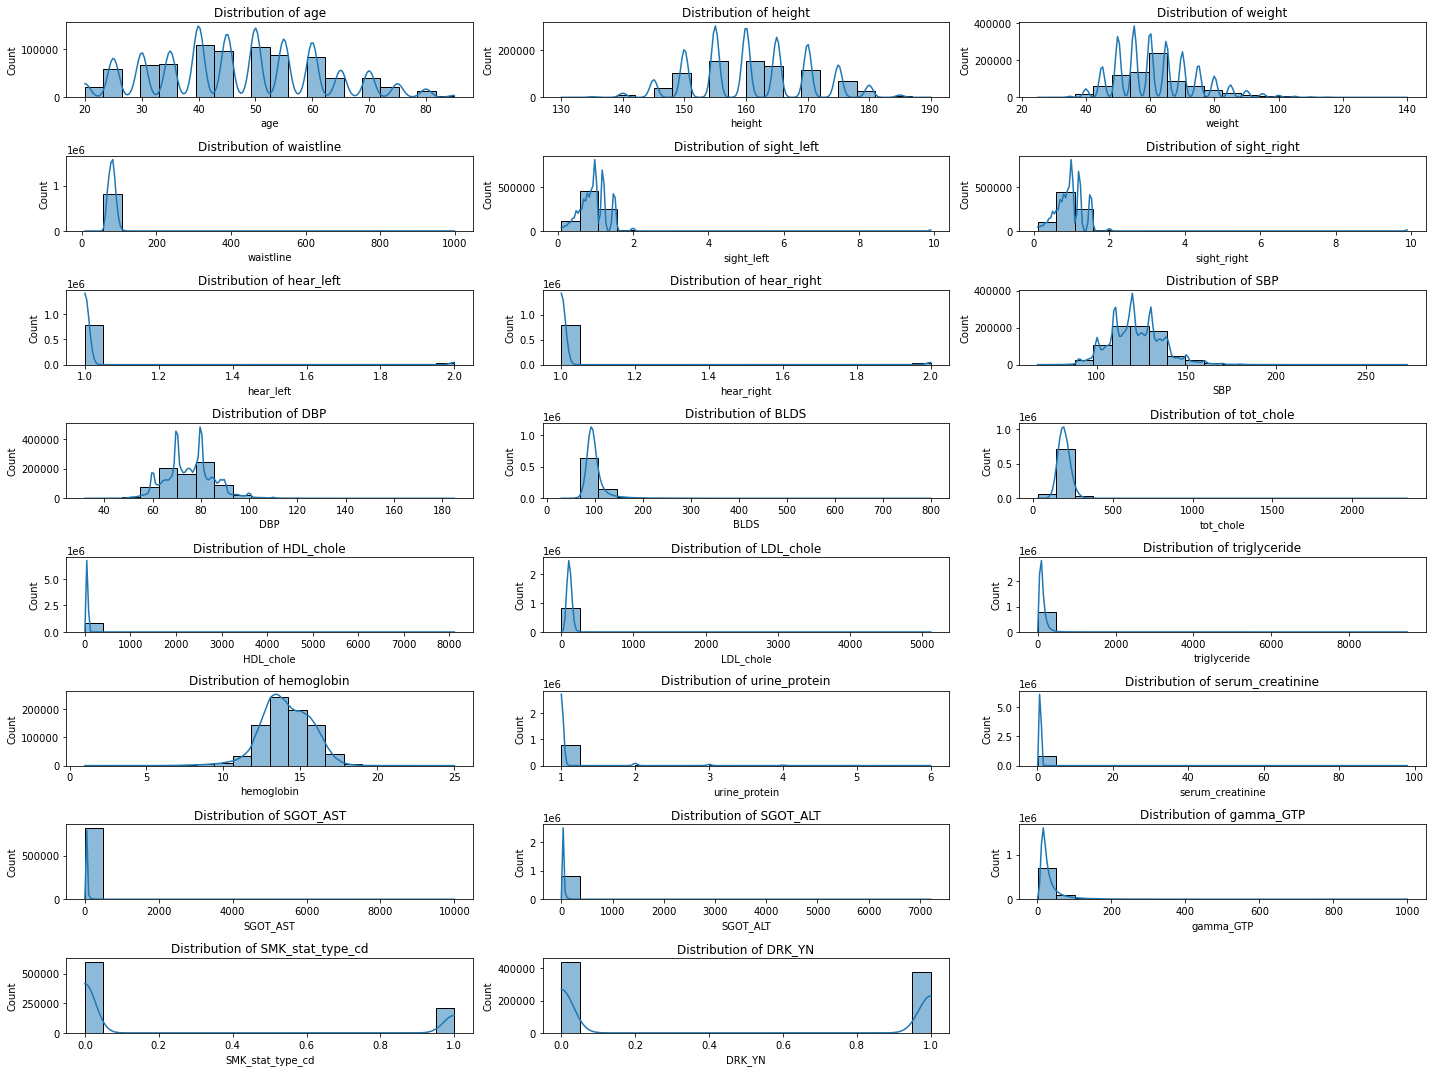

In [ ]:
# Visualize the distribution of each feature
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(numerical_cols)

# Plot distribution for each numerical feature
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(8, 3, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

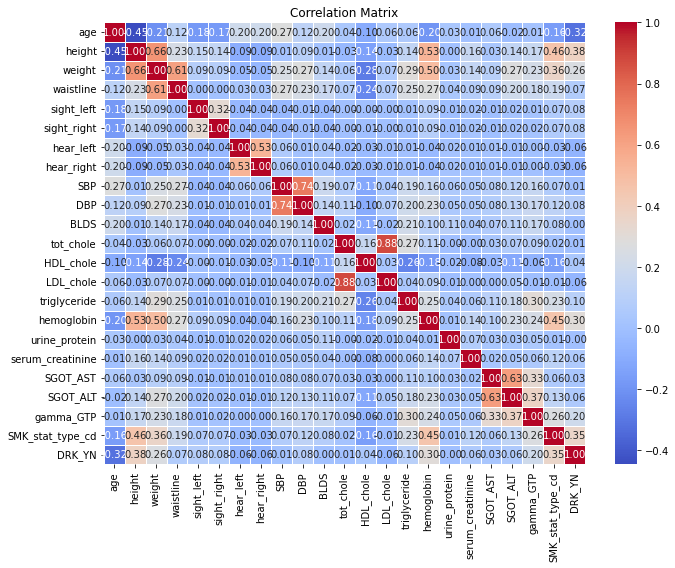

In [ ]:
# Explore relationships between features
# Plot correlations between numerical features
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

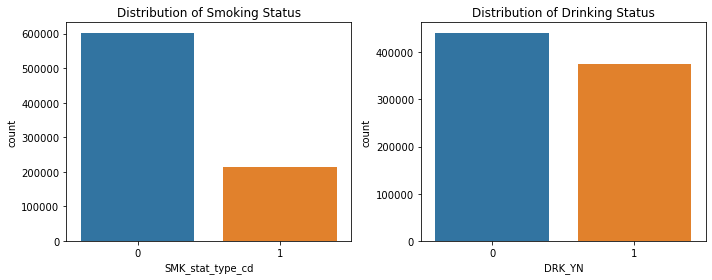

In [ ]:
# Visualize target variable distribution
# Visualizing the distribution of the target variable: SMK_stat_type_cd and DRK_YN
plt.figure(figsize=(10, 4))

# Smoking status distribution
plt.subplot(1, 2, 1)
sns.countplot(x=df['SMK_stat_type_cd'])
plt.title('Distribution of Smoking Status')

# Drinking status distribution
plt.subplot(1, 2, 2)
sns.countplot(x=df['DRK_YN'])
plt.title('Distribution of Drinking Status')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate correlations between features and target variables (SMK_stat_type_cd)
correlation_with_smoking = df.iloc[:, 1:].corr()['SMK_stat_type_cd'].sort_values(ascending=False)
correlation_with_smoking

SMK_stat_type_cd    1.000000
height              0.459930
hemoglobin          0.453443
weight              0.359447
DRK_YN              0.353788
gamma_GTP           0.261221
triglyceride        0.230909
waistline           0.185548
SGOT_ALT            0.130546
DBP                 0.119918
serum_creatinine    0.116154
BLDS                0.081324
SBP                 0.072320
sight_right         0.067225
sight_left          0.066606
SGOT_AST            0.060168
tot_chole           0.015242
urine_protein       0.013673
LDL_chole          -0.013220
hear_left          -0.029452
hear_right         -0.029705
HDL_chole          -0.156099
age                -0.160751
Name: SMK_stat_type_cd, dtype: float64

In [ ]:
# Calculate correlations between features and target variables (DRK_YN)
correlation_with_drinking = df.iloc[:, 1:].corr()['DRK_YN'].sort_values(ascending=False)
correlation_with_drinking

DRK_YN              1.000000
height              0.377692
SMK_stat_type_cd    0.353788
hemoglobin          0.296340
weight              0.255091
gamma_GTP           0.201978
triglyceride        0.098838
DBP                 0.083307
sight_left          0.081245
sight_right         0.077524
waistline           0.072677
serum_creatinine    0.057321
SGOT_ALT            0.057103
HDL_chole           0.043826
SGOT_AST            0.031661
SBP                 0.011874
tot_chole           0.005595
BLDS                0.003708
urine_protein      -0.001157
LDL_chole          -0.055714
hear_right         -0.062160
hear_left          -0.062494
age                -0.320364
Name: DRK_YN, dtype: float64

Features with moderate correlation with Smoking Status (SMK_stat_type_cd):
SMK_stat_type_cd    1.000000
height              0.459930
hemoglobin          0.453443
weight              0.359447
DRK_YN              0.353788
gamma_GTP           0.261221
triglyceride        0.230909
waistline           0.185548
SGOT_ALT            0.130546
DBP                 0.119918
serum_creatinine    0.116154
HDL_chole          -0.156099
age                -0.160751
Name: SMK_stat_type_cd, dtype: float64


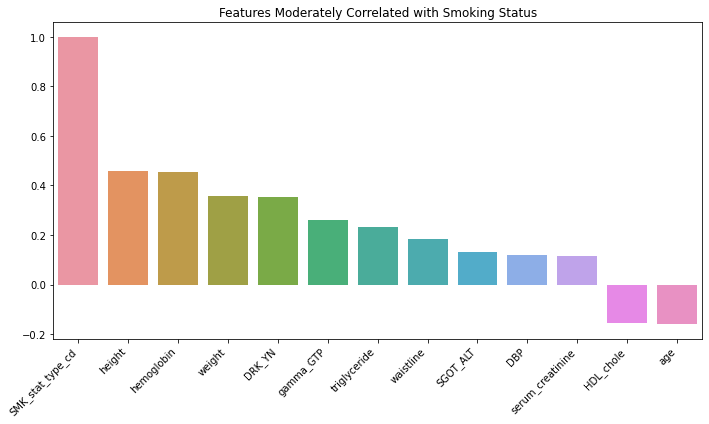

In [ ]:
# Adjusted Threshold
threshold = 0.1 

# Smoking Predictors
smoking_predictors = correlation_with_smoking[abs(correlation_with_smoking) >= threshold]
print("Features with moderate correlation with Smoking Status (SMK_stat_type_cd):")
print(smoking_predictors)

# Bar Plots for Visualization
# Smoking
plt.figure(figsize=(10, 6))
sns.barplot(x=smoking_predictors.index, y=smoking_predictors.values)
plt.xticks(rotation=45, ha='right')
plt.title("Features Moderately Correlated with Smoking Status")
plt.tight_layout()
plt.show()



Features with moderate correlation with Drinking Status (DRK_YN):
DRK_YN              1.000000
height              0.377692
SMK_stat_type_cd    0.353788
hemoglobin          0.296340
weight              0.255091
gamma_GTP           0.201978
age                -0.320364
Name: DRK_YN, dtype: float64


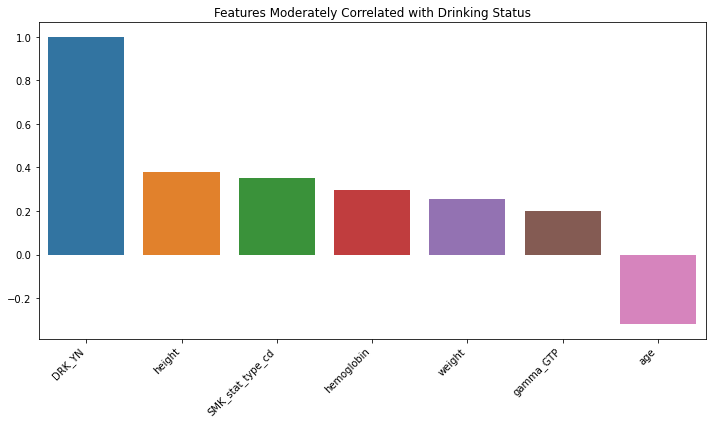

In [ ]:
# Drinking Predictors
drinking_predictors = correlation_with_drinking[abs(correlation_with_drinking) > threshold]
print("\nFeatures with moderate correlation with Drinking Status (DRK_YN):")
print(drinking_predictors)

# Drinking
plt.figure(figsize=(10, 6))
sns.barplot(x=drinking_predictors.index, y=drinking_predictors.values)
plt.xticks(rotation=45, ha='right')
plt.title("Features Moderately Correlated with Drinking Status")
plt.tight_layout()
plt.show()

# Feature Selection

In [21]:
# Prepare the features and target
X = df[smoking_predictors.index]
y = df['SMK_stat_type_cd']

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier()

# Fit the model
rf_model.fit(X, y)

# Get the feature importance scores
importance = rf_model.feature_importances_

# Create a DataFrame to view feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

             Feature  Importance
0   SMK_stat_type_cd    0.793761
1             height    0.060743
2         hemoglobin    0.058233
4             DRK_YN    0.027933
5          gamma_GTP    0.023983
10  serum_creatinine    0.010592
3             weight    0.007195
6       triglyceride    0.006154
7          waistline    0.004456
12               age    0.003339
11         HDL_chole    0.001800
8           SGOT_ALT    0.001005
9                DBP    0.000805


In [22]:
# Prepare the features and target
X = df[drinking_predictors.index]
y = df['DRK_YN']

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier()

# Fit the model
rf_model.fit(X, y)

# Get the feature importance scores
importance = rf_model.feature_importances_

# Create a DataFrame to view feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

            Feature  Importance
0            DRK_YN    0.878423
2  SMK_stat_type_cd    0.040524
1            height    0.025266
3        hemoglobin    0.023133
6               age    0.022374
5         gamma_GTP    0.009282
4            weight    0.000999


# Model Evaluation

### Logistic Regression Classifier

In [ ]:
# Select predictors for smoking prediction
smoking_features =  ['height', 'hemoglobin', 'weight',  'gamma_GTP']
X_smoking = df[smoking_features]
y_smoking = df['SMK_stat_type_cd']

# Split the data
X_train_smk, X_test_smk, y_train_smk, y_test_smk = train_test_split(
    X_smoking, y_smoking, test_size=0.2, random_state=42
)

# Initialize Logistic Regression
log_reg_smk = LogisticRegression()

# Train the model
log_reg_smk.fit(X_train_smk, y_train_smk)

# Predict
y_pred_smk = log_reg_smk.predict(X_test_smk)

# Evaluate the model
print("Smoking Prediction Results")
print("Accuracy:", accuracy_score(y_test_smk, y_pred_smk))
print("Classification Report:")
print(classification_report(y_test_smk, y_pred_smk))
print("Confusion Matrix:")
print(confusion_matrix(y_test_smk, y_pred_smk))

Smoking Prediction Results
Accuracy: 0.8057644724270561
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87    120236
           1       0.66      0.55      0.60     43040

    accuracy                           0.81    163276
   macro avg       0.75      0.72      0.74    163276
weighted avg       0.80      0.81      0.80    163276

Confusion Matrix:
[[107740  12496]
 [ 19218  23822]]


In [ ]:
# Select predictors for drinking prediction
drinking_features = ['height', 'age', 'hemoglobin']
X_drinking = df[drinking_features]
y_drinking = df['DRK_YN']

# Split the data
X_train_drk, X_test_drk, y_train_drk, y_test_drk = train_test_split(
    X_drinking, y_drinking, test_size=0.2, random_state=42
)

# Initialize Logistic Regression
log_reg_drk = LogisticRegression()

# Train the model
log_reg_drk.fit(X_train_drk, y_train_drk)

# Predict
y_pred_drk = log_reg_drk.predict(X_test_drk)

# Evaluate the model
print("\nDrinking Prediction Results")
print("Accuracy:", accuracy_score(y_test_drk, y_pred_drk))
print("Classification Report:")
print(classification_report(y_test_drk, y_pred_drk))
print("Confusion Matrix:")
print(confusion_matrix(y_test_drk, y_pred_drk))


Drinking Prediction Results
Accuracy: 0.7081444915358044
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     88429
           1       0.70      0.63      0.66     74847

    accuracy                           0.71    163276
   macro avg       0.71      0.70      0.70    163276
weighted avg       0.71      0.71      0.71    163276

Confusion Matrix:
[[68566 19863]
 [27790 47057]]


### k-NN Classifier

In [ ]:
# Select predictors for smoking prediction
smoking_features = ['hemoglobin', 'height', 'DRK_YN']
X_smoking = df[smoking_features]
y_smoking = df['SMK_stat_type_cd']

# Split the data
X_train_smk, X_test_smk, y_train_smk, y_test_smk = train_test_split(
    X_smoking, y_smoking, test_size=0.2, random_state=42
)

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train_smk_scaled = scaler.fit_transform(X_train_smk)
X_test_smk_scaled = scaler.transform(X_test_smk)

# Initialize and train KNN
knn_smk = KNeighborsClassifier(n_neighbors=5)  # Default to 5 neighbors; can tune this
knn_smk.fit(X_train_smk_scaled, y_train_smk)

# Predict on test data
y_pred_knn_smk = knn_smk.predict(X_test_smk_scaled)

# Evaluate KNN
print("Smoking Prediction using KNN")
print("Accuracy:", accuracy_score(y_test_smk, y_pred_knn_smk))
print("Classification Report:")
print(classification_report(y_test_smk, y_pred_knn_smk))
print("Confusion Matrix:")
print(confusion_matrix(y_test_smk, y_pred_knn_smk))

Smoking Prediction using KNN
Accuracy: 0.7806781155834293
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85    120236
           1       0.60      0.52      0.55     43040

    accuracy                           0.78    163276
   macro avg       0.72      0.70      0.70    163276
weighted avg       0.77      0.78      0.78    163276

Confusion Matrix:
[[105170  15066]
 [ 20744  22296]]


In [ ]:
# Select predictors for drinking prediction
drinking_features = ['height', 'age', 'hemoglobin']
X_drinking = df[drinking_features]
y_drinking = df['DRK_YN']

# Split the data
X_train_drk, X_test_drk, y_train_drk, y_test_drk = train_test_split(
    X_drinking, y_drinking, test_size=0.2, random_state=42
)

# Feature scaling
X_train_drk_scaled = scaler.fit_transform(X_train_drk)
X_test_drk_scaled = scaler.transform(X_test_drk)

# Initialize and train KNN
knn_drk = KNeighborsClassifier(n_neighbors=5)  # Default to 5 neighbors; can tune this
knn_drk.fit(X_train_drk_scaled, y_train_drk)

# Predict on test data
y_pred_knn_drk = knn_drk.predict(X_test_drk_scaled)

# Evaluate KNN
print("\nDrinking Prediction using KNN")
print("Accuracy:", accuracy_score(y_test_drk, y_pred_knn_drk))
print("Classification Report:")
print(classification_report(y_test_drk, y_pred_knn_drk))
print("Confusion Matrix:")
print(confusion_matrix(y_test_drk, y_pred_knn_drk))


Drinking Prediction using KNN
Accuracy: 0.6654009162399863
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69     88429
           1       0.64      0.63      0.63     74847

    accuracy                           0.67    163276
   macro avg       0.66      0.66      0.66    163276
weighted avg       0.67      0.67      0.67    163276

Confusion Matrix:
[[61150 27279]
 [27353 47494]]


### Naive-Bayes Classifier

In [ ]:
# Select predictors for smoking prediction
smoking_features = ['hemoglobin', 'height', 'DRK_YN']
X_smoking = df[smoking_features]
y_smoking = df['SMK_stat_type_cd']

# Split the data
X_train_smk, X_test_smk, y_train_smk, y_test_smk = train_test_split(
    X_smoking, y_smoking, test_size=0.2, random_state=42
)

# Initialize Naive Bayes
nb_smk = GaussianNB()

# Train the model
nb_smk.fit(X_train_smk, y_train_smk)

# Predict
y_pred_smk = nb_smk.predict(X_test_smk)

# Evaluate the model
print("Smoking Prediction Results")
print("Accuracy:", accuracy_score(y_test_smk, y_pred_smk))
print("Classification Report:")
print(classification_report(y_test_smk, y_pred_smk))
print("Confusion Matrix:")
print(confusion_matrix(y_test_smk, y_pred_smk))

Smoking Prediction Results
Accuracy: 0.8042761949092334
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86    120236
           1       0.61      0.70      0.65     43040

    accuracy                           0.80    163276
   macro avg       0.75      0.77      0.76    163276
weighted avg       0.81      0.80      0.81    163276

Confusion Matrix:
[[101224  19012]
 [ 12945  30095]]


In [ ]:
# Select predictors for drinking prediction
drinking_features = ['height', 'age', 'hemoglobin']
X_drinking = df[drinking_features]
y_drinking = df['DRK_YN']

# Split the data
X_train_drk, X_test_drk, y_train_drk, y_test_drk = train_test_split(
    X_drinking, y_drinking, test_size=0.2, random_state=42
)

# Initialize Naive Bayes
nb_drk = GaussianNB()

# Train the model
nb_drk.fit(X_train_drk, y_train_drk)

# Predict
y_pred_drk = nb_drk.predict(X_test_drk)

# Evaluate the model
print("\nDrinking Prediction Results")
print("Accuracy:", accuracy_score(y_test_drk, y_pred_drk))
print("Classification Report:")
print(classification_report(y_test_drk, y_pred_drk))
print("Confusion Matrix:")
print(confusion_matrix(y_test_drk, y_pred_drk))


Drinking Prediction Results
Accuracy: 0.7046473455988633
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74     88429
           1       0.71      0.61      0.65     74847

    accuracy                           0.70    163276
   macro avg       0.70      0.70      0.70    163276
weighted avg       0.70      0.70      0.70    163276

Confusion Matrix:
[[69450 18979]
 [29245 45602]]


### Linear & Quadratic Discriminant Analysis

In [ ]:
# Select predictors for smoking prediction
smoking_features = ['hemoglobin', 'height', 'weight', 'gamma_GTP']
X_smoking = df[smoking_features]
y_smoking = df['SMK_stat_type_cd']

# Split the data
X_train_smk, X_test_smk, y_train_smk, y_test_smk = train_test_split(
    X_smoking, y_smoking, test_size=0.2, random_state=42
)

# Initialize LDA and QDA
lda_smk = LinearDiscriminantAnalysis()
qda_smk = QuadraticDiscriminantAnalysis()

# Train LDA
lda_smk.fit(X_train_smk, y_train_smk)
y_pred_lda_smk = lda_smk.predict(X_test_smk)

# Train QDA
qda_smk.fit(X_train_smk, y_train_smk)
y_pred_qda_smk = qda_smk.predict(X_test_smk)

# Evaluate LDA
print("Smoking Prediction using LDA")
print("Accuracy:", accuracy_score(y_test_smk, y_pred_lda_smk))
print("Classification Report:")
print(classification_report(y_test_smk, y_pred_lda_smk))
print("Confusion Matrix:")
print(confusion_matrix(y_test_smk, y_pred_lda_smk))

# Evaluate QDA
print("\nSmoking Prediction using QDA")
print("Accuracy:", accuracy_score(y_test_smk, y_pred_qda_smk))
print("Classification Report:")
print(classification_report(y_test_smk, y_pred_qda_smk))
print("Confusion Matrix:")
print(confusion_matrix(y_test_smk, y_pred_qda_smk))


Smoking Prediction using LDA
Accuracy: 0.802702173007668
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87    120236
           1       0.64      0.58      0.61     43040

    accuracy                           0.80    163276
   macro avg       0.75      0.73      0.74    163276
weighted avg       0.80      0.80      0.80    163276

Confusion Matrix:
[[105885  14351]
 [ 17863  25177]]

Smoking Prediction using QDA
Accuracy: 0.8049192777873049
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87    120236
           1       0.63      0.62      0.63     43040

    accuracy                           0.80    163276
   macro avg       0.75      0.75      0.75    163276
weighted avg       0.80      0.80      0.80    163276

Confusion Matrix:
[[104627  15609]
 [ 16243  26797]]


In [ ]:
# Select predictors for drinking prediction
drinking_features = ['height', 'age', 'hemoglobin']
X_drinking = df[drinking_features]
y_drinking = df['DRK_YN']

# Split the data
X_train_drk, X_test_drk, y_train_drk, y_test_drk = train_test_split(
    X_drinking, y_drinking, test_size=0.2, random_state=42
)

# Initialize LDA and QDA
lda_drk = LinearDiscriminantAnalysis()
qda_drk = QuadraticDiscriminantAnalysis()

# Train LDA
lda_drk.fit(X_train_drk, y_train_drk)
y_pred_lda_drk = lda_drk.predict(X_test_drk)

# Train QDA
qda_drk.fit(X_train_drk, y_train_drk)
y_pred_qda_drk = qda_drk.predict(X_test_drk)

# Evaluate LDA
print("\nDrinking Prediction using LDA")
print("Accuracy:", accuracy_score(y_test_drk, y_pred_lda_drk))
print("Classification Report:")
print(classification_report(y_test_drk, y_pred_lda_drk))
print("Confusion Matrix:")
print(confusion_matrix(y_test_drk, y_pred_lda_drk))

# Evaluate QDA
print("\nDrinking Prediction using QDA")
print("Accuracy:", accuracy_score(y_test_drk, y_pred_qda_drk))
print("Classification Report:")
print(classification_report(y_test_drk, y_pred_qda_drk))
print("Confusion Matrix:")
print(confusion_matrix(y_test_drk, y_pred_qda_drk))


Drinking Prediction using LDA
Accuracy: 0.7075320316519268
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     88429
           1       0.71      0.62      0.66     74847

    accuracy                           0.71    163276
   macro avg       0.71      0.70      0.70    163276
weighted avg       0.71      0.71      0.71    163276

Confusion Matrix:
[[69287 19142]
 [28611 46236]]

Drinking Prediction using QDA
Accuracy: 0.7032938092554938
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.74     88429
           1       0.71      0.59      0.65     74847

    accuracy                           0.70    163276
   macro avg       0.71      0.69      0.70    163276
weighted avg       0.70      0.70      0.70    163276

Confusion Matrix:
[[70523 17906]
 [30539 44308]]


### RandomForest Classifier

In [ ]:
# Selected important features
selected_features = ['hemoglobin', 'height', 'weight', 'gamma_GTP']

# Prepare the features and target variable
X = df[selected_features]
y = df['SMK_stat_type_cd']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87    120236
           1       0.63      0.64      0.64     43040

    accuracy                           0.81    163276
   macro avg       0.75      0.75      0.75    163276
weighted avg       0.81      0.81      0.81    163276

[[104170  16066]
 [ 15399  27641]]


In [ ]:
# Selected important features
selected_features = ['height', 'age', 'hemoglobin']

# Prepare the features and target variable
X = df[selected_features]
y = df['DRK_YN']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73     88429
           1       0.68      0.67      0.68     74847

    accuracy                           0.71    163276
   macro avg       0.70      0.70      0.70    163276
weighted avg       0.71      0.71      0.71    163276

[[64853 23576]
 [24411 50436]]
